I wanted to understand the https://en.wikipedia.org/wiki/Cambrian_explosion better

So I looked for a database of fossils and found https://paleobiodb.org

Make sure to download your own data or unzip `pbdb_data.zip` if this is your first time running.

In [62]:
"""

I downloaded all the data from
From https://paleobiodb.org/classic/displayDownloadGenerator 
https://paleobiodb.org/data1.2/occs/list.tsv?datainfo&rowcount&max_ma=5000

Small data samples:
https://paleobiodb.org/data1.2/occs/list.tsv?datainfo&rowcount&max_ma=5000&textresult&limit=100
https://paleobiodb.org/data1.2/occs/list.txt?datainfo&rowcount&limit=100&max_ma=5000


The data looks like this:
==================
Data Provider	The Paleobiology Database
Data Source	The Paleobiology Database
Data License	Creative Commons CC-BY
License URL	http://creativecommons.org/licenses/by/4.0/
Documentation URL	http://paleobiodb.org/data1.2/occs/list_doc.html
Data URL	http://paleobiodb.org/data1.2/occs/list.tsv?datainfo&rowcount&max_ma=5000
Access Time	Sun 2019-02-10 10:09:18 GMT
Title	PBDB Data Service
Parameters:
	max_ma	5000
	timerule	major
	taxon_status	all
Elapsed Time	92.5
Records Found	1385506
Records Returned	1385506
Records:
occurrence_no	record_type	reid_no	flags	collection_no	identified_name	identified_rank	identified_no	difference	accepted_name	accepted_rank	accepted_no	early_interval	late_interval	max_ma	min_ma	reference_no
1	occ			1	Australosutura llanoensis	species	349412		Australosutura llanoensis	species	349412	Ivorian		353.8	345.3	1
2	occ			1	Carbonocoryphe planucauda	species	349526		Carbonocoryphe planucauda	species	349526	Ivorian		353.8	345.3	1
3	occ			1	Thigriffides roundyi	species	349420		Thigriffides roundyi	species	349418	Ivorian		353.8	345.3	1
4	occ			2	Pudoproetus chappelensis	species	349411		Pudoproetus chappelensis	species	349410	Ivorian		353.8	345.3	1
5	occ			3	Pudoproetus chappelensis	species	349411		Pudoproetus chappelensis	species	349410	Ivorian		353.8	345.3	1
7	occ			4	Pudoproetus chappelensis	species	349411		Pudoproetus chappelensis	species	349410	Kinderhookian	Osagean	358.9	342.8	1
[...]
""" 

import os
import sys

src_dir = '.' #os.path.dirname(os.path.abspath(__file__))
db_fpath = os.path.join(src_dir, 'pbdb_data.tsv')
out_path = os.path.join(src_dir, 'out.csv')

i = 0
print("{}".format(os.path.abspath('.')))
f_lines = open(db_fpath, 'rb')

print("looking for header")
for line in f_lines:
    if b'Records:' in line:
        break

header_str = next(f_lines)
header = header_str.split(b'\t')
name_to_col = { name: i for i, name in enumerate(header)}
max_ma_i = name_to_col[b"max_ma"]
min_ma_i = name_to_col[b"min_ma"]
name_i = name_to_col[b"identified_name"]

print(header)

times = []

with open(out_path, 'w') as f_out:
  f_out.write("name,age\n")
  for i, line in enumerate(f_lines):
      items = line.split(b'\t')
      if len(items) != len(header):
          print("Bogus item count at line #{}: '{}'".format(i, line))
          break
      max_ma = float(items[max_ma_i])
      min_ma = float(items[min_ma_i])
      name = items[name_i]
      avg_ma = (max_ma + min_ma) / 2.0
#       if avg_ma > 1000:
#           # Pseudofossil
#           # Protosphaeridium conglutianatum
#           print(line)
#           continue
      #print(min_ma, max_ma)
      #f_out.write("{},{}\n".format(name, avg_ma))
      times.append(avg_ma)
      # if i > 10:
      #     break

      # i += 1

print("done")


3.6.4 (v3.6.4:d48eceb, Dec 19 2017, 06:54:40) [MSC v.1900 64 bit (AMD64)]
C:\Users\yuv\Downloads\paleobiodb
looking for header
[b'occurrence_no', b'record_type', b'reid_no', b'flags', b'collection_no', b'identified_name', b'identified_rank', b'identified_no', b'difference', b'accepted_name', b'accepted_rank', b'accepted_no', b'early_interval', b'late_interval', b'max_ma', b'min_ma', b'reference_no\r\n']
done


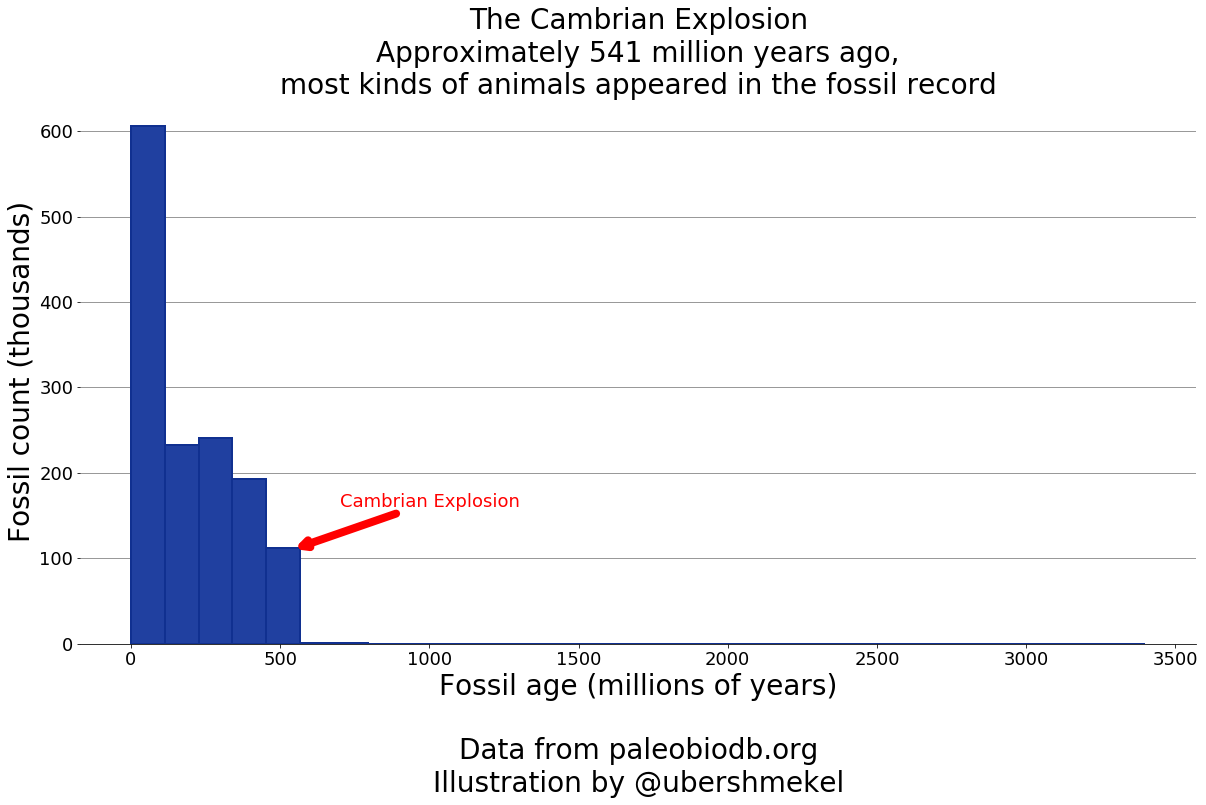

In [124]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

%matplotlib inline


# Fixing random state for reproducibility
#np.random.seed(19680801)
#mu, sigma = 100, 15
#x = mu + sigma * np.random.randn(10000)

# the histogram of the data
fig = plt.figure(figsize=(20,10))
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(False)  

#plt.grid(True)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')

n, bins, patches = plt.hist(times, bins=30, density=False, facecolor='#2040a0', edgecolor='#103090', linewidth=2) #, alpha=0.5)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(
    lambda y, pos: '%.0f' % (y * 1e-3)))

plt.xlabel('Fossil age (millions of years)\n\nData from paleobiodb.org\nIllustration by @ubershmekel', fontsize=28)
plt.ylabel('Fossil count (thousands)', fontsize=28)
plt.title('The Cambrian Explosion\nApproximately 541 million years ago,\nmost kinds of animals appeared in the fossil record', fontsize=28)
ax.annotate("Cambrian Explosion", xy=(540, 110000), xytext=(700, 160000),
            arrowprops=dict(arrowstyle="->", color="#ff0000", linewidth=8), fontsize=18, color="#ff0000")

plt.show()
